# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.797  1  1.335 0.249 0.007   
                             age       0.123  1  0.206 0.650 0.001   
                             Kiel      2.288  1  3.834 0.052 0.020   
                             Magdeburg 4.631  1  7.759 0.006 0.039   
                             Sweden    7.707  1 12.912 0.000 0.063   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.221  1  0.257 0.612 0.001   
                             age       1.098  1  1.277 0.260 0.007   
                             Kiel      0.015  1  0.017 0.895 0.000   
                             Magdeburg 1.866  1  2.172 0.142 0.011   
                             Sweden    9.755  1 11.353 0.001 0.056   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.603  0.409    False  
                             age               0.187  0.772    False  
                             Kiel              1.287  0.126    False  
                             Magdeburg         2.230  0.022     True  
                             Sweden            3.382  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.213  0.741    False  
                             age               0.585  0.420    False  
                             Kiel              0.048  0.941    False  
                             Magdeburg         0.847  0.273    False  
                             Sweden            3.040  0.005     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.603  1  3.658 0.057 0.019   
                             age        0.020  1  0.120 0.729 0.001   
                             Kiel       0.448  1  2.719 0.101 0.014   
                             Magdeburg  0.984  1  5.973 0.015 0.030   
                             Sweden     2.476  1 15.027 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.013  1  1.566 0.212 0.008   
                             age        0.480  1  0.250 0.618 0.001   
                             Kiel       9.605  1  4.992 0.027 0.025   
                             Magdeburg 20.791  1 10.805 0.001 0.054   
                             Sweden     0.057  1  0.030 0.863 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.242  0.126    False  
                             age               0.137  0.822    False  
                             Kiel              0.997  0.198    False  
                             Magdeburg         1.812  0.044     True  
                             Sweden            3.837  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.673  0.351    False  
                             age               0.209  0.736    False  
                             Kiel              1.575  0.069    False  
                             Magdeburg         2.919  0.005     True  
                             Sweden            0.064  0.916    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.249         0.603  0.409    False   
                             Kiel      0.052         1.287  0.126    False   
                             Magdeburg 0.006         2.230  0.022     True   
                             Sweden    0.000         3.382  0.002     True   
                             age       0.650         0.187  0.772    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.612         0.213  0.741    False   
                             Kiel      0.895         0.048  0.941    False   
                             Magdeburg 0.142         0.847  0.273    False   
                             Sweden    0.001         3.040  0.005     True   
                             age       0.260         0.585  0.420    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.057         1.242  0.126    False  
                             Kiel      0.101         0.997  0.198    False  
                             Magdeburg 0.015         1.812  0.044     True  
                             Sweden    0.000         3.837  0.001     True  
                             age       0.729         0.137  0.822    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.212         0.673  0.351    False  
                             Kiel      0.027         1.575  0.069    False  
                             Magdeburg 0.001         2.919  0.005     True  
                             Sweden    0.863         0.064  0.916    False  
                             age       0.618         0.209  0.736    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.262         2.480     0.340     0.246         2.742     0.313
std       0.303         5.308     0.331     0.299         5.187     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.014     0.002         0.360     0.009
50%       0.125         0.903     0.250     0.092         1.036     0.184
75%       0.467         2.444     0.623     0.436         2.662     0.581
max       1.000       141.696     1.000     0.999        84.560     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34474/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.249         0.603   
A0A024R0T9;K7ER74;P02655                           AD     0.053         1.272   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.057         1.245   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.488         0.312   
A0A075B6H7                                         AD     0.067         1.172   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.035         1.459   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.282         0.549   
S4R3U6                                             AD     0.612         0.213   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.409    False   
A0A024R0T9;K7ER74;P02655                           AD      0.129    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.136    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.641    False   
A0A075B6H7                                         AD      0.155    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.092    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.445    False   
S4R3U6                                             AD      0.741    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.057         1.242   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.520   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.383         0.417   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.295         0.530   
A0A075B6H7                                         AD     0.048         1.320   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.083         1.082   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.682         0.166   
S4R3U6                                             AD     0.212         0.673   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.126    False  
A0A024R0T9;K7ER74;P02655                           AD      0.076    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.535    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.446    False  
A0A075B6H7                                         AD      0.110    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.409     0.337     0.247         1.491     0.320
std       0.288         1.643     0.315     0.290         1.787     0.315
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.011         0.364     0.038     0.009         0.365     0.029
50%       0.125         0.901     0.251     0.106         0.973     0.207
75%       0.433         1.942     0.592     0.431         2.030     0.578
max       1.000        21.521     1.000     0.999        26.501     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,998


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.249         0.603  0.409   
A0A024R0T9;K7ER74;P02655                           0.053         1.272  0.129   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.057         1.245  0.136   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.488         0.312  0.641   
A0A075B6H7                                         0.067         1.172  0.155   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.318   
Q9Y6X5                                             0.035         1.459  0.092   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.282         0.549  0.445   
S4R3U6                                             0.612         0.213  0.741   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.057   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.383   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.295   
A0A075B6H7                                            False 0.048   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.083   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.682   
S4R3U6                                                False 0.212   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.242  0.126   
A0A024R0T9;K7ER74;P02655                                   1.520  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.417  0.535   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.530  0.446   
A0A075B6H7                                                 1.320  0.110   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.082  0.169   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.166  0.787   
S4R3U6                                                     0.673  0.351   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    964
PI (yes) - QRILC (yes)   357
PI (no)  - QRILC (yes)    66
PI (yes) - QRILC (no)     34
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34474/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.019         1.717  0.057    False   
A0A075B6J9                            0.035         1.450  0.093    False   
A0A075B7B8                            0.635         0.197  0.761    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.001         2.907  0.006     True   
A0A087WWT2;Q9NPD7                     0.049         1.307  0.122    False   
...                                     ...           ...    ...      ...   
Q9P0K9                                0.043         1.367  0.109    False   
Q9UJ14                                0.026         1.591  0.072    False   
Q9UNW1                                0.013         1.899  0.041     True   
Q9UQ52                                0.058         1.236  0.138    False   
Q9Y490                                0.014         1.867  0.043     True   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.003         2.597  0.010     True   
A0A075B6J9                            0.007         2.129  0.024     True   
A0A075B7B8                            0.000         3.468  0.002     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.182         0.740  0.311    False   
A0A087WWT2;Q9NPD7                     0.007         2.172  0.022     True   
...                                     ...           ...    ...      ...   
Q9P0K9                                0.009         2.028  0.029     True   
Q9UJ14                                0.012         1.905  0.037     True   
Q9UNW1                                0.115         0.939  0.220    False   
Q9UQ52                                0.014         1.843  0.042     True   
Q9Y490                                0.978         0.010  0.987    False   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A075B6J9                                  156  
A0A075B7B8                                   57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
...                                         ...  
Q9P0K9                                      192  
Q9UJ14                                      169  
Q9UNW1                                      171  
Q9UQ52                                      188  
Q9Y490                                       57  

[100 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.409,0.126,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.129,0.076,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.136,0.535,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.641,0.446,196,PI (no) - QRILC (no)
A0A075B6H7,0.155,0.110,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.318,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.092,0.169,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q9Y490,0.043,0.987,57,PI (yes) - QRILC (no),0.944
A0A075B7B8,0.761,0.002,57,PI (no) - QRILC (yes),0.760
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.733,0.000,86,PI (no) - QRILC (yes),0.733
F6SYF8;Q9UBP4,0.453,0.005,196,PI (no) - QRILC (yes),0.448
A0A0J9YW36;Q9NZ72;Q9NZ72-2,0.014,0.378,92,PI (yes) - QRILC (no),0.365
...,...,...,...,...,...
P02743,0.069,0.045,195,PI (no) - QRILC (yes),0.024
B0QYF8;P02144,0.037,0.054,167,PI (yes) - QRILC (no),0.017
K7ERI9;P02654,0.041,0.053,196,PI (yes) - QRILC (no),0.012


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


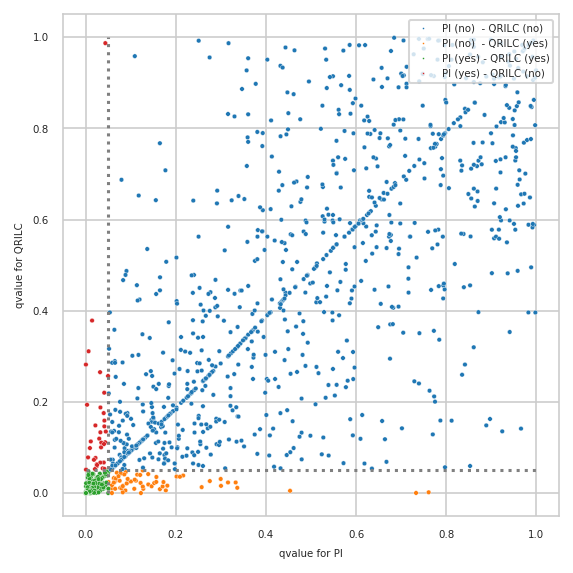

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


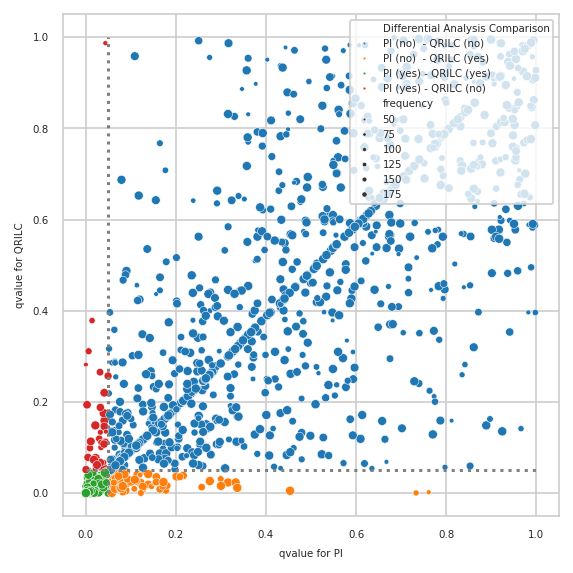

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
TREM2,ENSP00000362205,4.823
...,...,...
KREMEN2,ENSP00000304422,0.680
ZFYVE9,ENSP00000287727,0.680
MAMSTR,ENSP00000324175,0.680


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out